In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
data = pd.read_csv("AAPL.csv")

data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
1255,2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
1256,2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500
1257,2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47602100
1258,2024-04-04,170.289993,171.919998,168.820007,168.820007,168.820007,53704400


Data cleaning

In [327]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [328]:
data.shape

(1259, 7)

In [329]:
# Handling outliers in the Close Column

z_scores = (data['Close'] - data['Close'].mean()) / data['Close'].std()

outliers = z_scores.abs() > 3

data = data[~outliers]

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-04,48.697498,49.092499,48.285000,48.922501,47.097641,76457200
1,2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412914,74106400
2,2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159004,103526800
3,2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014606,143072800
4,2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284164,86781200
...,...,...,...,...,...,...,...
1254,2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
1255,2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
1256,2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500
1257,2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47602100


In [330]:
data.shape

(1259, 7)

In [331]:
# Checking data consistency in column headers and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [332]:
# Changing Date's object dtype to datetime

data['Date'] = pd.to_datetime(data['Date'])

data.info()

data['Date']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


0      2019-04-04
1      2019-04-05
2      2019-04-08
3      2019-04-09
4      2019-04-10
          ...    
1254   2024-03-28
1255   2024-04-01
1256   2024-04-02
1257   2024-04-03
1258   2024-04-04
Name: Date, Length: 1259, dtype: datetime64[ns]

In [333]:
data['Daily Return Percentage'] = data['Adj Close'].pct_change()

In [334]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return Percentage
0,2019-04-04,48.697498,49.092499,48.285000,48.922501,47.097641,76457200,NaN
1,2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412914,74106400,0.006694
2,2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159004,103526800,0.015736
3,2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014606,143072800,-0.002998
4,2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284164,86781200,0.005614


In [335]:
# Remove NaN value in first row for Weekly Return
data.dropna(subset=['Daily Return Percentage'], inplace=True)

In [336]:
data['Price Range'] = data['High'] - data['Low']

In [337]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return Percentage,Price Range
1,2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412914,74106400,0.006694,0.292504
2,2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159004,103526800,0.015736,0.972500
3,2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014606,143072800,-0.002998,0.905003
4,2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284164,86781200,0.005614,0.640003
5,2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882236,83603200,-0.008324,0.639999


Exploratory Data Analysis

In [338]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return Percentage,Price Range
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,2021-10-03 02:52:50.747217664,130.054187,131.518893,128.689183,130.175395,128.638817,9.825181e+07,0.001215,2.829710
min,2019-04-05 00:00:00,43.860001,44.480000,42.567501,43.325001,41.869553,2.404830e+07,-0.128647,0.292504
25%,2020-07-06 06:00:00,92.096877,93.307501,91.235626,92.672499,90.628115,6.482710e+07,-0.008329,1.639999
50%,2021-10-02 12:00:00,141.724998,143.394996,139.474998,141.955002,140.226295,8.492310e+07,0.000753,2.580002
75%,2023-01-02 00:00:00,166.565006,168.672505,165.092499,166.372498,164.869977,1.151837e+08,0.012303,3.593123
max,2024-04-04 00:00:00,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08,0.119808,12.809998
std,NaN,44.235810,44.580063,43.874981,44.242189,44.571390,5.199745e+07,0.020007,1.661477


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1 to 1258
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1258 non-null   datetime64[ns]
 1   Open                     1258 non-null   float64       
 2   High                     1258 non-null   float64       
 3   Low                      1258 non-null   float64       
 4   Close                    1258 non-null   float64       
 5   Adj Close                1258 non-null   float64       
 6   Volume                   1258 non-null   int64         
 7   Daily Return Percentage  1258 non-null   float64       
 8   Price Range              1258 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 98.3 KB


  Plotting Closing Time Series

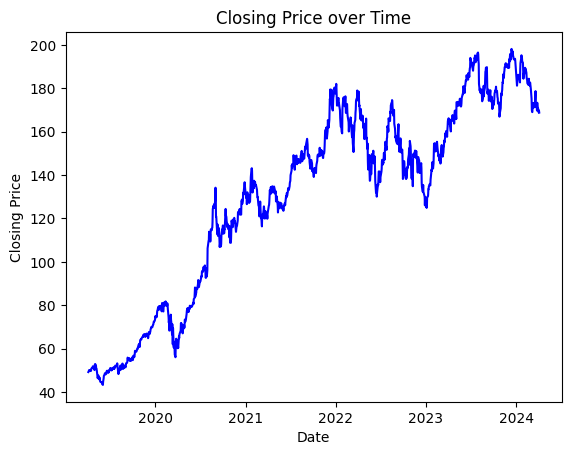

In [340]:
plt.plot(data['Date'], data['Close'], color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price over Time')
plt.show()

In [341]:
# Grabbing the weeks for 2023-2024 only

dates_2023_2024 = data[(data['Date'].dt.year == 2023) | (data['Date'].dt.year == 2024)]['Date']

close_2023_2024 = data[(data['Date'].dt.year == 2023) | (data['Date'].dt.year == 2024)]['Close']

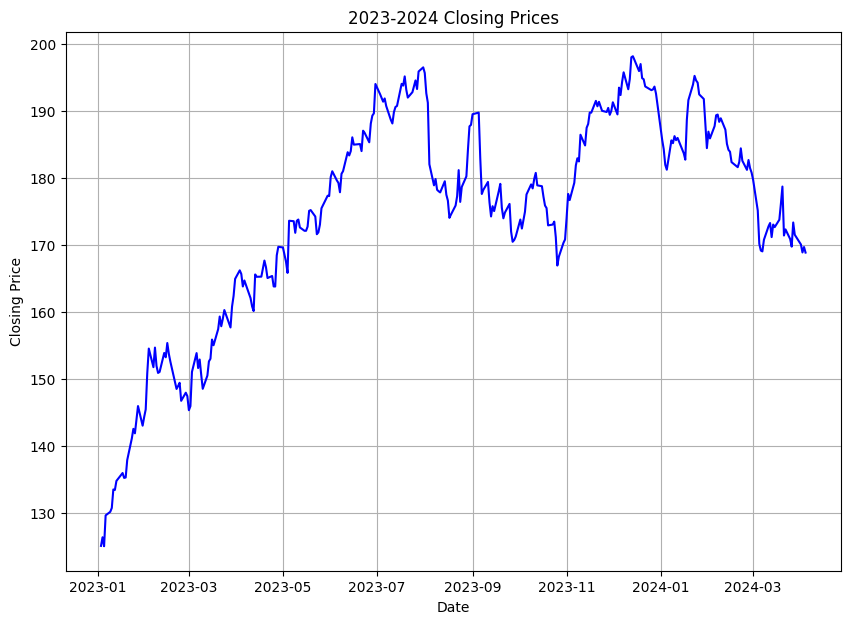

In [342]:
plt.figure(figsize=(10, 7))
plt.plot(dates_2023_2024, close_2023_2024, color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('2023-2024 Closing Prices')
plt.grid()
plt.show()

In [353]:
data['SMA_30'] = data['Close'].rolling(window=30).mean()

data['SMA_30']

1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
           ...    
1254    175.894333
1255    175.433333
1256    174.984333
1257    174.587333
1258    174.137333
Name: SMA_30, Length: 1258, dtype: float64

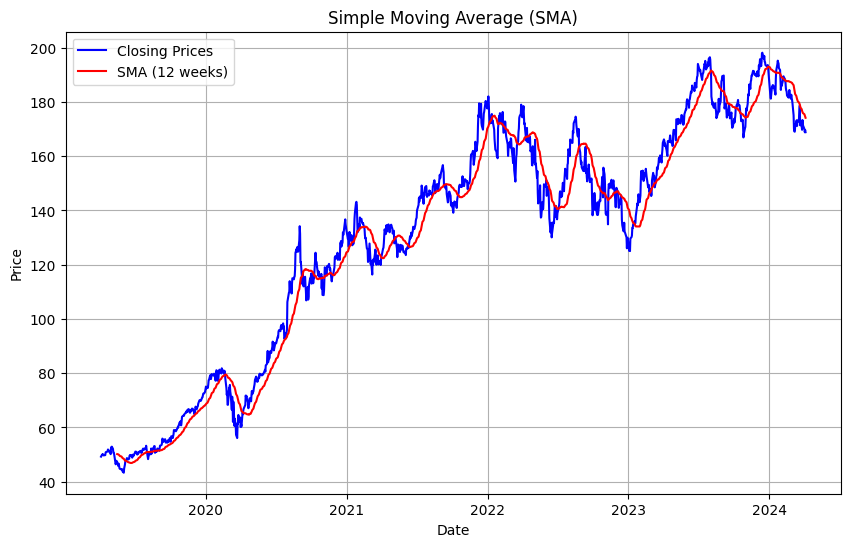

In [354]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='blue', label='Closing Prices')
plt.plot(data['Date'], data['SMA_30'], color='red', label='SMA (12 weeks)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Moving Average (SMA)')
plt.legend()
plt.grid(True)
plt.show()

In [345]:
SMA_30_2023_2024 = data[(data['Date'].dt.year == 2023) | (data['Date'].dt.year == 2024)]['Close'].rolling(window=12).mean()

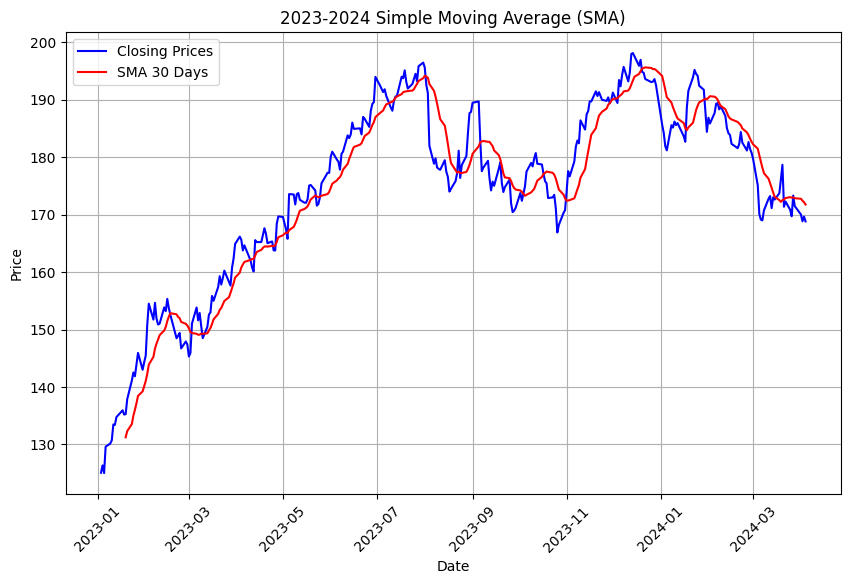

In [346]:
plt.figure(figsize=(10, 6))
plt.plot(dates_2023_2024, close_2023_2024, color='blue', label='Closing Prices')
plt.plot(dates_2023_2024, SMA_30_2023_2024, color='red', label='SMA 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2023-2024 Simple Moving Average (SMA)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Relative Strength Index

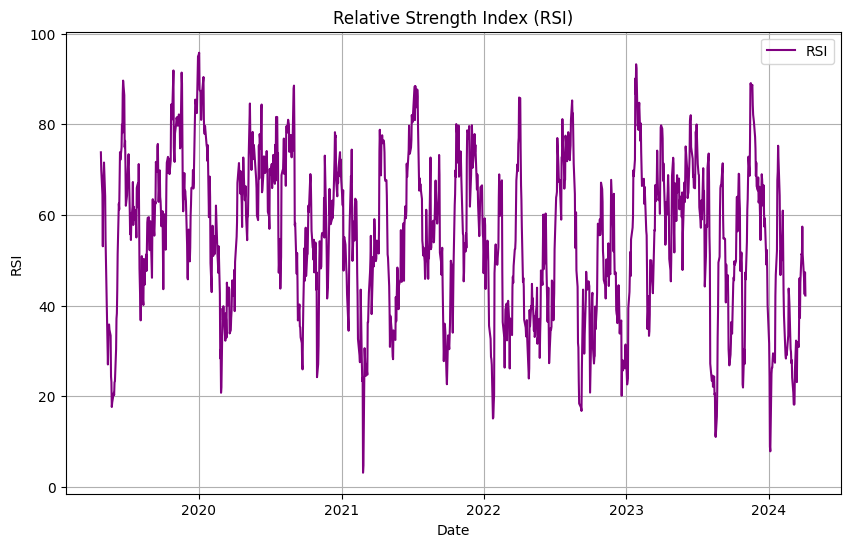

In [347]:

def calculate_rsi(data, window=14):
    # Calculate price changes
    delta = data['Close'].diff(1)
    
    # Separate gains (positive changes) and losses (negative changes)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    
    # Calculate RS (Relative Strength)
    rs = gain / loss
    
    # Calculate RSI (Relative Strength Index)
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Assuming 'data' is your DataFrame containing historical stock price data
data['RSI'] = calculate_rsi(data)

# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['RSI'], color='purple', label='RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()


Visualizing Daily Return

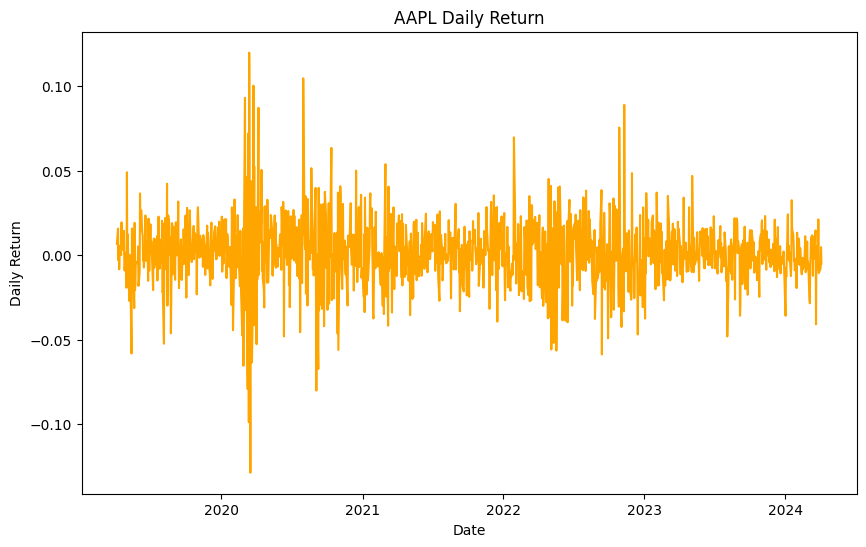

In [348]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Daily Return Percentage'], color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('AAPL Daily Return')
plt.show()

Daily Returns for 2023-2024

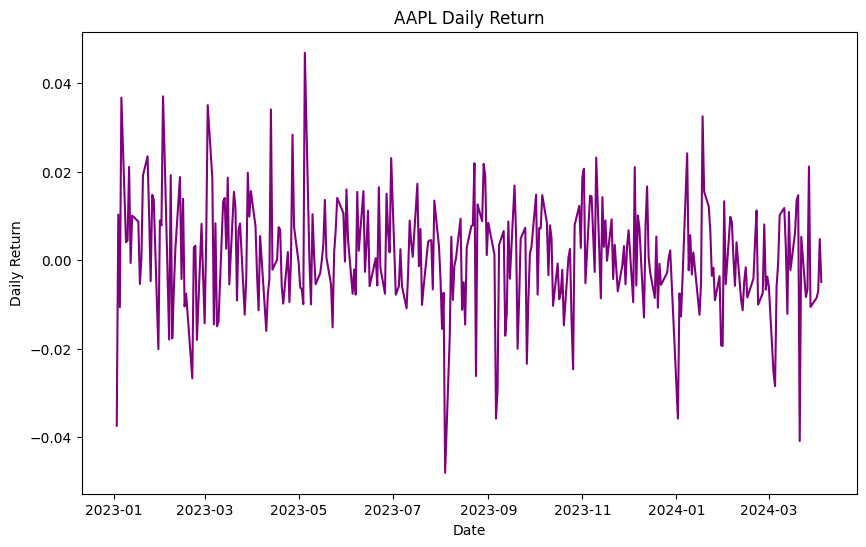

In [349]:
plt.figure(figsize=(10, 6))
plt.plot(dates_2023_2024, data[(data['Date'].dt.year == 2023) | (data['Date'].dt.year == 2024)]['Daily Return Percentage'], color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('AAPL Daily Return')
plt.show()

Volatility Weekly Return

In [350]:
data['Volatility'] = data['Daily Return Percentage'].rolling(window=30).std() * np.sqrt(30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


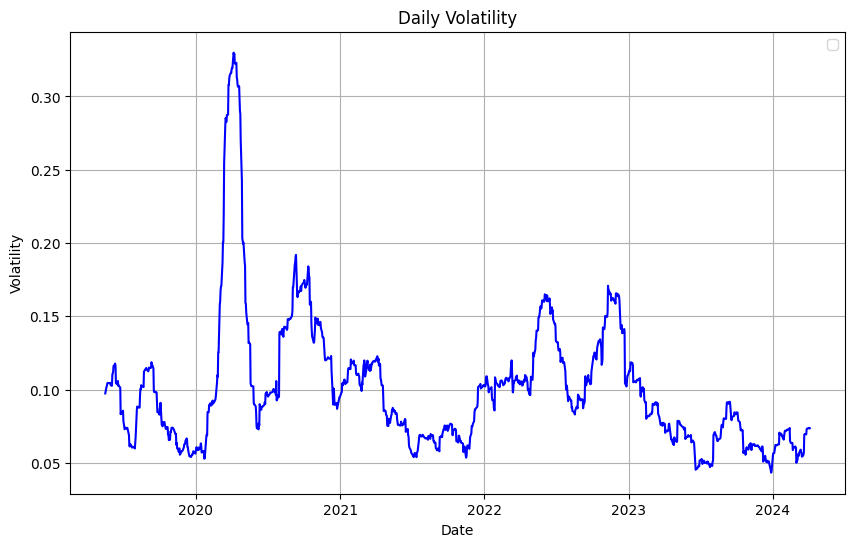

In [351]:
# Plot volatility
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Volatility'], color='blue')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Daily Volatility')
plt.legend()
plt.grid(True)
plt.show()


Volatility 2023-2024

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


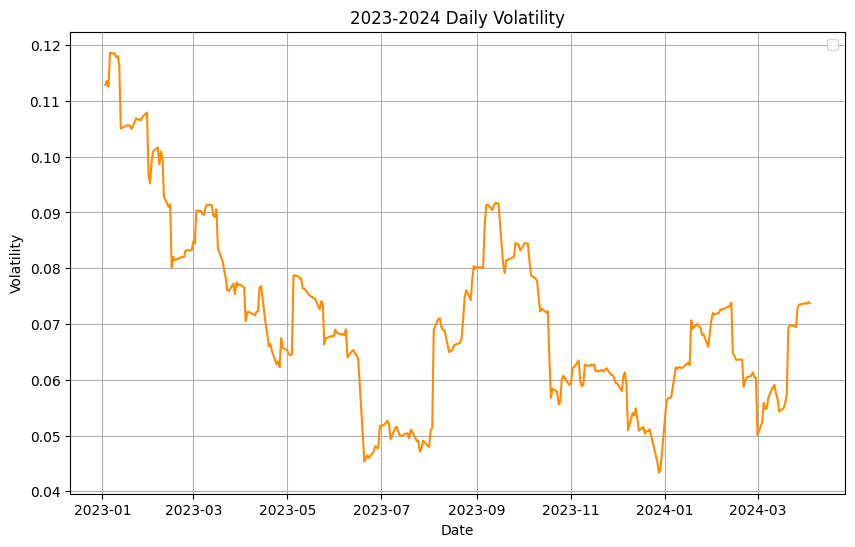

In [355]:
# Plot volatility
plt.figure(figsize=(10, 6))
plt.plot(dates_2023_2024, data[(data['Date'].dt.year == 2023) | (data['Date'].dt.year == 2024)]['Volatility'], color='darkorange')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('2023-2024 Daily Volatility')
plt.legend()
plt.grid(True)
plt.show()
